In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from collections import namedtuple, deque

from unityagents import UnityEnvironment
from dqn_agent import DQNAgent

## Set Environment

In [2]:
env = UnityEnvironment(file_name='../Banana.app')

brain_name = env.brain_names[0] # get the brain from unity environment
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
print('Environment Info')
env_info = env.reset(train_mode=False)[brain_name] # reset environment to a new, random state
state = env_info.vector_observations[0] 
action_size = brain.vector_action_space_size

print('Number of agents: {}'.format(len(env_info.agents)))
print('State space: {}'.format(len(state)))
print('Action space: {}'.format(action_size))

Environment Info
Number of agents: 1
State space: 37
Action space: 4


## 🎬 Watch The Agent

In [4]:
total_score = []
num_episodes = 10

for i in range(1, num_episodes+1):
    
    score = 0
    print(f'Watching episode {i}...', end='')
    
    while True:
                
        action = np.random.randint(action_size)
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        score += reward
        state = next_state
        
        if done:
            clear_output(wait=True)
            
            total_score.append(score)
            env.reset()
            break

print('Watching finished.')
print('Average score for {} episodes: {}'.format(num_episodes, np.mean(total_score)))

Watching finished.
Average score for 10 episodes: 0.5


## Init DQN Agent

In [5]:
agent = DQNAgent(state_size=env_info.vector_observations[0].shape[0], action_size=action_size, seed=90)

## Train DQN Agent

In [6]:
NUM_EPISODES = 1000
MAX_TIME = 1000
PRINT_EVERY = 100

In [7]:
def train_agent(num_episodes, max_time=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Train DQN agent."""
    
    scores = []
    scores_target = 13.0
    scores_window = deque(maxlen=100)
    eps = eps_start
    
    for i_episode in range(1, num_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for time_step in range(max_time):
            
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state, reward, done = env_info.vector_observations[0], env_info.rewards[0], env_info.local_done[0]
            
            agent.memorize(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        
        scores_window.append(score)
        scores.append(score)
        eps = max(eps_end, eps_decay*eps)
        
        print(f'\rEpisode: {i_episode}, Average Score: {np.mean(scores_window):.2f}', end='')
        
        if i_episode % PRINT_EVERY == 0:
            print(f'\rEpisode: {i_episode}, Average Score: {np.mean(scores_window):.2f}')
        if np.mean(scores_window) >= scores_target:
            print(f'\nEnvironment solved in {i_episode-100:d} episodes! Average Score: {np.mean(scores_window):.2f}')
            if not os.path.exists('./weights/'): os.makedirs('./weights/')
            agent.save(f'./weights/DQN_{brain_name}.pth')
            
    print('Training completed.')
    return scores

In [8]:
scores = train_agent(num_episodes=NUM_EPISODES, max_time=MAX_TIME)

Episode: 100, Average Score: 0.77
Episode: 200, Average Score: 4.14
Episode: 300, Average Score: 7.51
Episode: 400, Average Score: 10.65
Episode: 500, Average Score: 12.83
Episode: 505, Average Score: 13.00
Environment solved in 405 episodes! Average Score: 13.00
Episode: 506, Average Score: 13.02
Environment solved in 406 episodes! Average Score: 13.02
Episode: 507, Average Score: 13.06
Environment solved in 407 episodes! Average Score: 13.06
Episode: 508, Average Score: 13.03
Environment solved in 408 episodes! Average Score: 13.03
Episode: 509, Average Score: 13.02
Environment solved in 409 episodes! Average Score: 13.02
Episode: 510, Average Score: 13.00
Environment solved in 410 episodes! Average Score: 13.00
Episode: 511, Average Score: 13.07
Environment solved in 411 episodes! Average Score: 13.07
Episode: 512, Average Score: 13.00
Environment solved in 412 episodes! Average Score: 13.00
Episode: 513, Average Score: 13.09
Environment solved in 413 episodes! Average Score: 13.09


Episode: 593, Average Score: 14.23
Environment solved in 493 episodes! Average Score: 14.23
Episode: 594, Average Score: 14.17
Environment solved in 494 episodes! Average Score: 14.17
Episode: 595, Average Score: 14.14
Environment solved in 495 episodes! Average Score: 14.14
Episode: 596, Average Score: 14.12
Environment solved in 496 episodes! Average Score: 14.12
Episode: 597, Average Score: 14.05
Environment solved in 497 episodes! Average Score: 14.05
Episode: 598, Average Score: 14.05
Environment solved in 498 episodes! Average Score: 14.05
Episode: 599, Average Score: 14.01
Environment solved in 499 episodes! Average Score: 14.01
Episode: 600, Average Score: 13.97

Environment solved in 500 episodes! Average Score: 13.97
Episode: 601, Average Score: 13.95
Environment solved in 501 episodes! Average Score: 13.95
Episode: 602, Average Score: 13.95
Environment solved in 502 episodes! Average Score: 13.95
Episode: 603, Average Score: 13.94
Environment solved in 503 episodes! Average 

Episode: 683, Average Score: 14.32
Environment solved in 583 episodes! Average Score: 14.32
Episode: 684, Average Score: 14.24
Environment solved in 584 episodes! Average Score: 14.24
Episode: 685, Average Score: 14.22
Environment solved in 585 episodes! Average Score: 14.22
Episode: 686, Average Score: 14.27
Environment solved in 586 episodes! Average Score: 14.27
Episode: 687, Average Score: 14.27
Environment solved in 587 episodes! Average Score: 14.27
Episode: 688, Average Score: 14.35
Environment solved in 588 episodes! Average Score: 14.35
Episode: 689, Average Score: 14.35
Environment solved in 589 episodes! Average Score: 14.35
Episode: 690, Average Score: 14.27
Environment solved in 590 episodes! Average Score: 14.27
Episode: 691, Average Score: 14.22
Environment solved in 591 episodes! Average Score: 14.22
Episode: 692, Average Score: 14.22
Environment solved in 592 episodes! Average Score: 14.22
Episode: 693, Average Score: 14.18
Environment solved in 593 episodes! Average S

Episode: 773, Average Score: 14.23
Environment solved in 673 episodes! Average Score: 14.23
Episode: 774, Average Score: 14.23
Environment solved in 674 episodes! Average Score: 14.23
Episode: 775, Average Score: 14.23
Environment solved in 675 episodes! Average Score: 14.23
Episode: 776, Average Score: 14.24
Environment solved in 676 episodes! Average Score: 14.24
Episode: 777, Average Score: 14.26
Environment solved in 677 episodes! Average Score: 14.26
Episode: 778, Average Score: 14.19
Environment solved in 678 episodes! Average Score: 14.19
Episode: 779, Average Score: 14.20
Environment solved in 679 episodes! Average Score: 14.20
Episode: 780, Average Score: 14.18
Environment solved in 680 episodes! Average Score: 14.18
Episode: 781, Average Score: 14.26
Environment solved in 681 episodes! Average Score: 14.26
Episode: 782, Average Score: 14.21
Environment solved in 682 episodes! Average Score: 14.21
Episode: 783, Average Score: 14.21
Environment solved in 683 episodes! Average S

Episode: 863, Average Score: 14.71
Environment solved in 763 episodes! Average Score: 14.71
Episode: 864, Average Score: 14.79
Environment solved in 764 episodes! Average Score: 14.79
Episode: 865, Average Score: 14.77
Environment solved in 765 episodes! Average Score: 14.77
Episode: 866, Average Score: 14.77
Environment solved in 766 episodes! Average Score: 14.77
Episode: 867, Average Score: 14.80
Environment solved in 767 episodes! Average Score: 14.80
Episode: 868, Average Score: 14.72
Environment solved in 768 episodes! Average Score: 14.72
Episode: 869, Average Score: 14.65
Environment solved in 769 episodes! Average Score: 14.65
Episode: 870, Average Score: 14.64
Environment solved in 770 episodes! Average Score: 14.64
Episode: 871, Average Score: 14.64
Environment solved in 771 episodes! Average Score: 14.64
Episode: 872, Average Score: 14.60
Environment solved in 772 episodes! Average Score: 14.60
Episode: 873, Average Score: 14.68
Environment solved in 773 episodes! Average S

Episode: 953, Average Score: 15.65
Environment solved in 853 episodes! Average Score: 15.65
Episode: 954, Average Score: 15.71
Environment solved in 854 episodes! Average Score: 15.71
Episode: 955, Average Score: 15.72
Environment solved in 855 episodes! Average Score: 15.72
Episode: 956, Average Score: 15.75
Environment solved in 856 episodes! Average Score: 15.75
Episode: 957, Average Score: 15.73
Environment solved in 857 episodes! Average Score: 15.73
Episode: 958, Average Score: 15.68
Environment solved in 858 episodes! Average Score: 15.68
Episode: 959, Average Score: 15.74
Environment solved in 859 episodes! Average Score: 15.74
Episode: 960, Average Score: 15.79
Environment solved in 860 episodes! Average Score: 15.79
Episode: 961, Average Score: 15.72
Environment solved in 861 episodes! Average Score: 15.72
Episode: 962, Average Score: 15.59
Environment solved in 862 episodes! Average Score: 15.59
Episode: 963, Average Score: 15.61
Environment solved in 863 episodes! Average S

## Evaluate The Agent

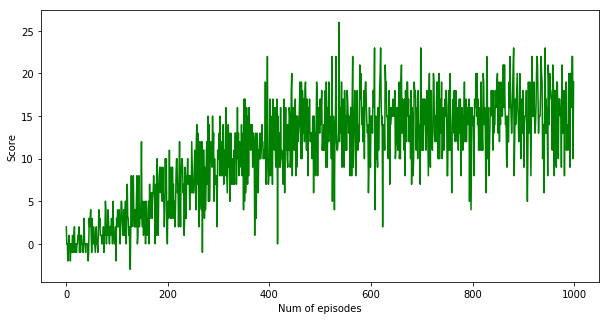

In [9]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(scores)), scores, color='green')
plt.xlabel('Num of episodes')
plt.ylabel('Score')
if not os.path.exists('./images/'): os.makedirs('./images/')
plt.savefig('./images/plot_of_dqn_agent_evaluation.png')
plt.show()

## 🎬 Watch The Smart Agent

In [10]:
agent.load(f'./weights/DQN_{brain_name}.pth')

In [11]:
num_episodes = 5
max_time=1000

scores = []

for i in range(1, num_episodes+1):
    
    print(f'Watching episode {i}...', end='')
    
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]
    score = 0    
    for time_step in range(max_time):
                
        action = agent.act(state)
        env_info = env.step(action)[brain_name]
        next_state, reward, done = env_info.vector_observations[0], env_info.rewards[0], env_info.local_done[0]
            
        state = next_state
        score += reward
        if done:
            clear_output(wait=True)

            env.reset()
            break
            
    scores.append(score)

print('Watching finished.')
print('Total score for {} episodes: {}'.format(num_episodes, np.mean(scores)))

Watching finished.
Total score for 5 episodes: 10.4


---